In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U seaborn
!pip install seaborn --upgrade
%matplotlib inline

1. Coleta de dados

Empresa que fornceceu os dados
https://www.kaggle.com/datasets/srolka/ecommerce-customers?resource=download&select=Ecommerce+Customers.csv


In [23]:
clientes = pd.read_csv("/content/Ecommerce Customers.csv")

In [24]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [26]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


2. Análise exploratória de dados

In [27]:
pip install pandas_profiling

In [18]:
from pandas_profiling import ProfileReport

In [28]:
relatorio = ProfileReport(clientes, title = 'Relatorio Clientes do Ecommerce')
relatorio.to_file('Relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
relatorio

Output hidden; open in https://colab.research.google.com to view.

Observações:



1.   A permanência no site não é um indicador de gasto maior
2.   Já no aplicativo o tempo de permanência se mostrou relevante com o valor gasto.
3. Os clientes mais antigos são os que mais gastam.




Qual a relação do tempo no site com o vaor gasto?

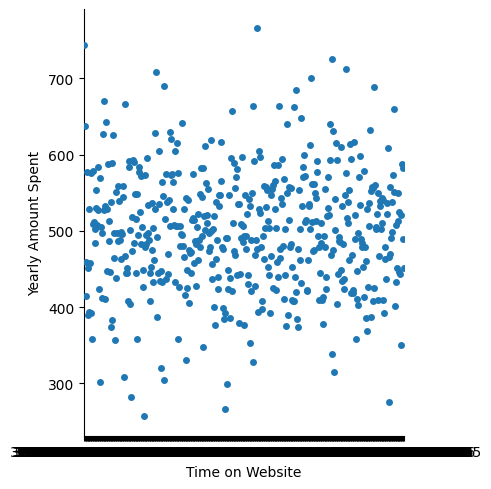

In [31]:
sns.catplot(x = 'Time on Website', y= 'Yearly Amount Spent', data=clientes)

Qual a relação do tempo no app com relação do valor gasto anual?

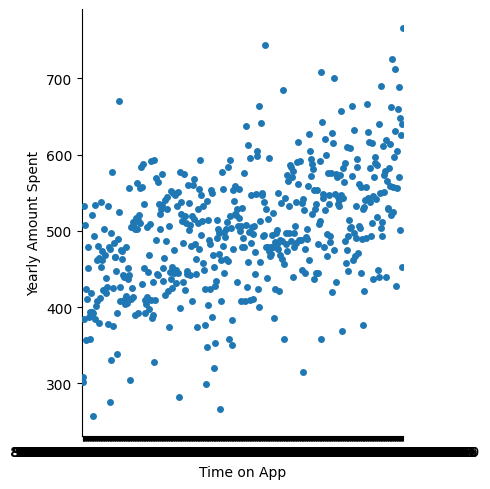

In [33]:
sns.catplot(x='Time on App' , y='Yearly Amount Spent', data=clientes)

Relação das pessoas que mais usam aplicativo com tempo de associação a loja

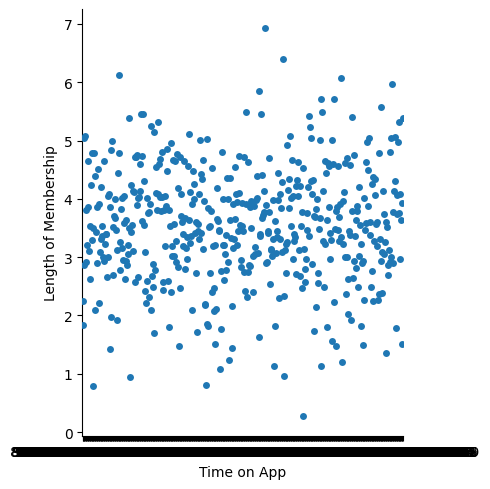

In [36]:
sns.catplot(x= 'Time on App', y='Length of Membership', data= clientes)

Quais variáveis tem mais relação com o gasto anual

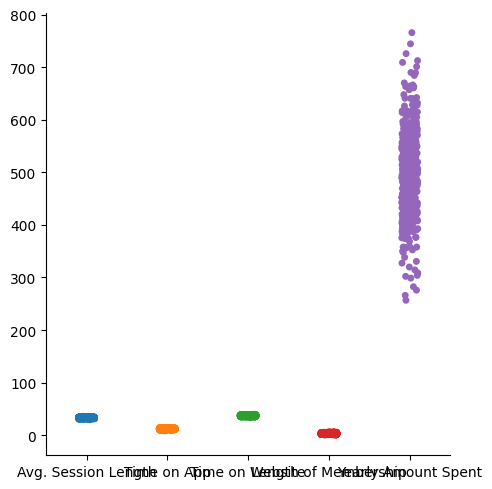

In [37]:
sns.catplot(clientes)

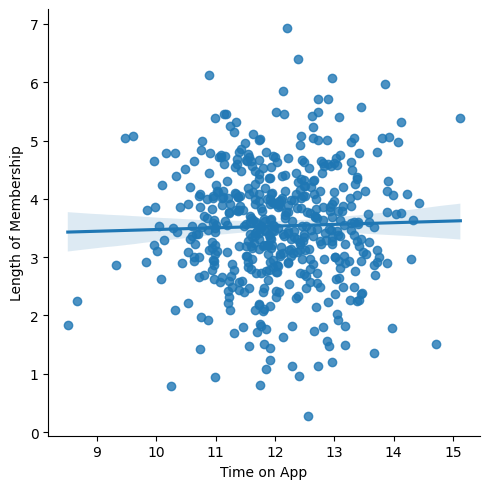

In [38]:
sns.lmplot(x= 'Time on App', y='Length of Membership', data= clientes)

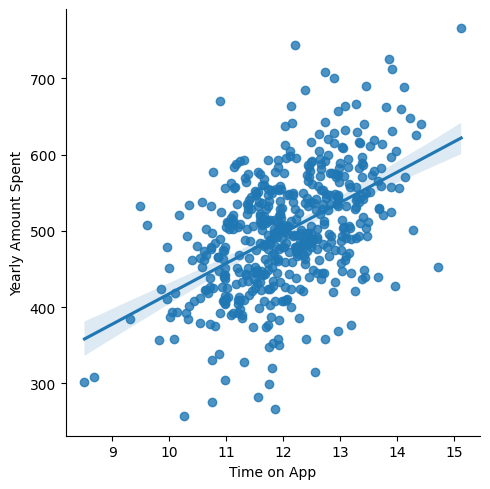

In [39]:
sns.lmplot(x='Time on App' , y='Yearly Amount Spent', data=clientes)

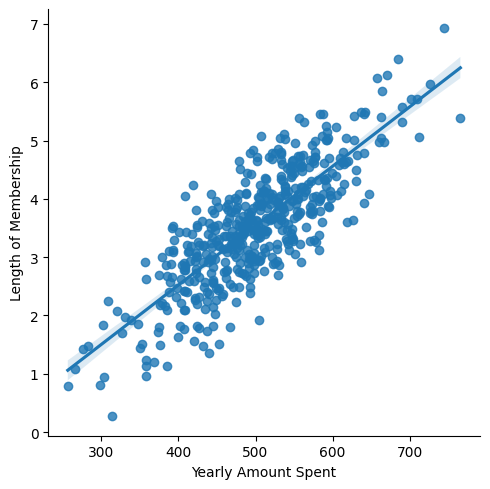

In [40]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data= clientes)

3. Criação de um modelo com todas as variáveis

In [41]:
y= clientes['Yearly Amount Spent']

In [47]:
X = clientes [['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

Divisão do código em treino e teste

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Criando um modelo de regressão linear sklearn

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

Utilizo o método fit() para treinamento do meu modelo

In [52]:
lm.fit(X_train, y_train)

LinearRegression()

Apresento os coeficientes para cada variável do meu X

In [53]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

Para validar o modelo no conjunto de teste, passo o método predict

In [54]:
ỹ = lm.predict(X_test)

In [55]:
ỹ

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

***Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos

Text(0, 0.5, 'ỹ predito')

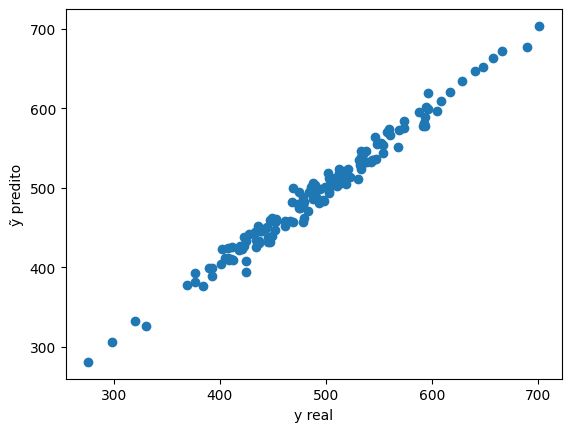

In [56]:
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

4. Avaliando o modelo

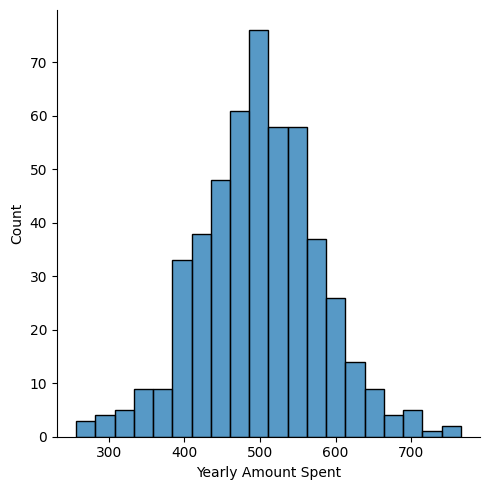

In [57]:
sns.displot(clientes, x='Yearly Amount Spent')
plt.tight_layout()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ ))
print('MSE', metrics.mean_squared_error(y_test, ỹ ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ )))
print('R:', metrics.r2_score(y_test, ỹ ))

MAE: 8.426091641432116
MSE 103.91554136503333
RMSE: 10.193897260863155
R: 0.9808757641125855


In [62]:
def adjusted_R(y, ỹ, N):
  adj_r = (1 - ((1 - metrics.r2_score(y, ỹ )) * (len(y) - 1)) / (len(y) - N - 1))
  return adj_r

In [63]:
print('R-adjust:' , adjusted_R(y_test, ỹ,  X_train.shape[1]))

R-adjust: 0.9803481989846567


Conclusões

O modelo linear resolveu o problema?

In [64]:
absolute_error = y_test-ỹ

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

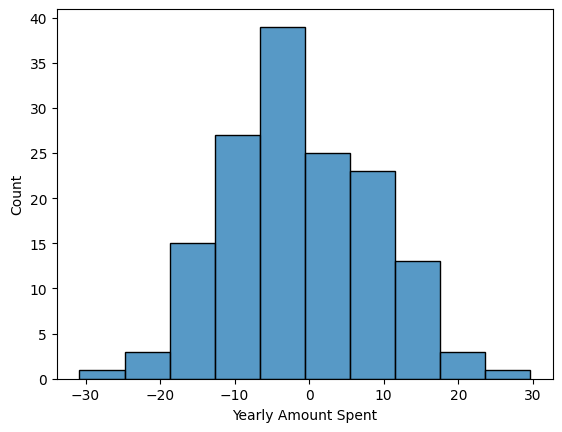

In [65]:
sns.histplot(absolute_error, bins=10)

Qual a variável mais importante do meu modelo?
É melhor investir em site ou no aplicativo?

In [67]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


1 A cada aumento em uma unidade no tempo médio das sessões com o estilista, temos um aumento de 25 dolares gasto no ano
2. A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38 dolares
3. O tempo no site não reflete a receita anual
4. A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61 dolares.